# Insurance charges dataset
### This dataset contains details of individuals and their insurance charges

### Let's understand the dataset

In [18]:
import pandas as pd

df = pd.read_csv('dados.csv')

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


In [20]:
print(df.head())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


In [21]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None


In [22]:
print(df.describe())

               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010


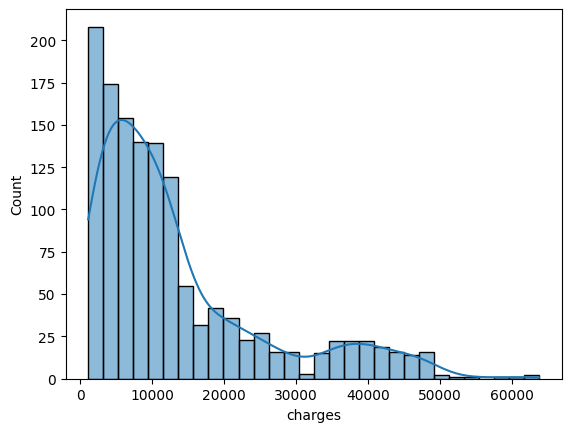

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['charges'], kde=True) # Distribuição das charges
plt.show()

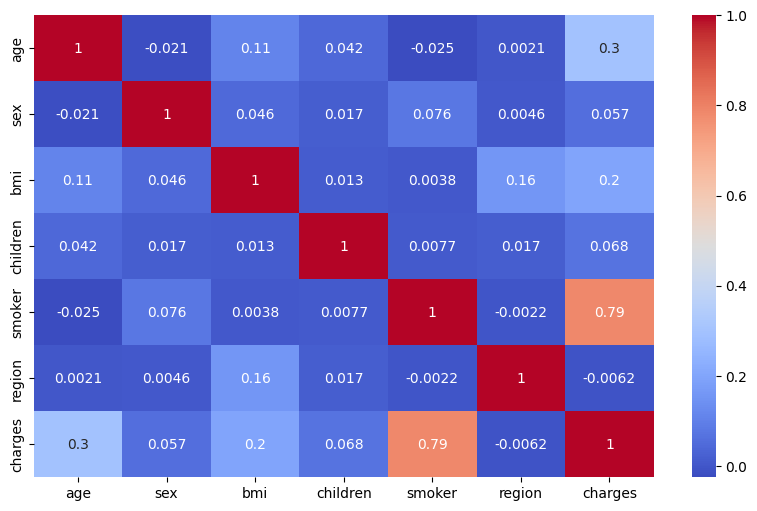

In [42]:
df_encoded = pd.get_dummies(df, drop_first=True)

# Plotar a matriz de correlação
plt.figure(figsize=(10,6))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm')
plt.show()

In [28]:
# Tratammento dos dados ausentes
print(df.isnull().sum())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [29]:
#remoção de dados com valores ausentes)
df.dropna(inplace=True)

In [31]:
from sklearn.preprocessing import LabelEncoder

# Transformando variáveis categóricas
df['sex'] = LabelEncoder().fit_transform(df['sex'])
df['smoker'] = LabelEncoder().fit_transform(df['smoker'])
df['region'] = LabelEncoder().fit_transform(df['region'])

In [32]:
from sklearn.model_selection import train_test_split

X = df.drop('charges', axis=1)
y = df['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [34]:
# Item 3 - Modelagem

from sklearn.model_selection import train_test_split

X = df.drop('charges', axis=1)
y = df['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [35]:
from sklearn.tree import DecisionTreeRegressor

# Modelo de Regressão com Árvores de Decisão
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [36]:
# Item 4 - Avaliação do Modelo

from sklearn.metrics import mean_absolute_error, r2_score

# Previsões
y_pred = model.predict(X_test)

# Avaliação
print("R²:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))

R²: 0.6843565603663775
MAE: 3154.705668541045


In [37]:
import numpy as np

# Cálculo de intervalos de confiança
residuals = y_test - y_pred
conf_interval = np.percentile(residuals, [2.5, 97.5])
print(f"Intervalo de confiança para os resíduos: {conf_interval}")

Intervalo de confiança para os resíduos: [-20195.7208365   16267.39231775]


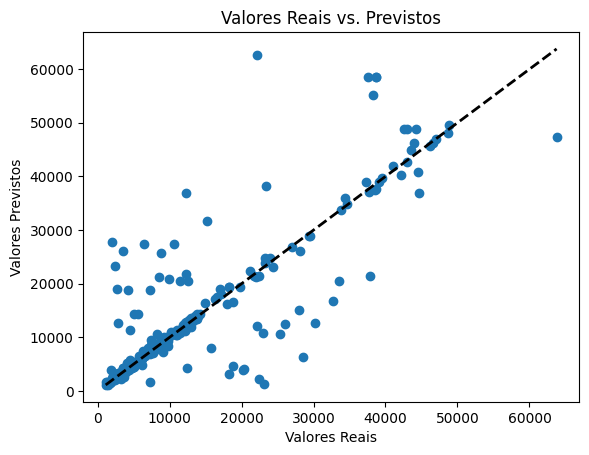

In [38]:
# Item 5 - Exibição
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Valores Reais')
plt.ylabel('Valores Previstos')
plt.title('Valores Reais vs. Previstos')
plt.show()

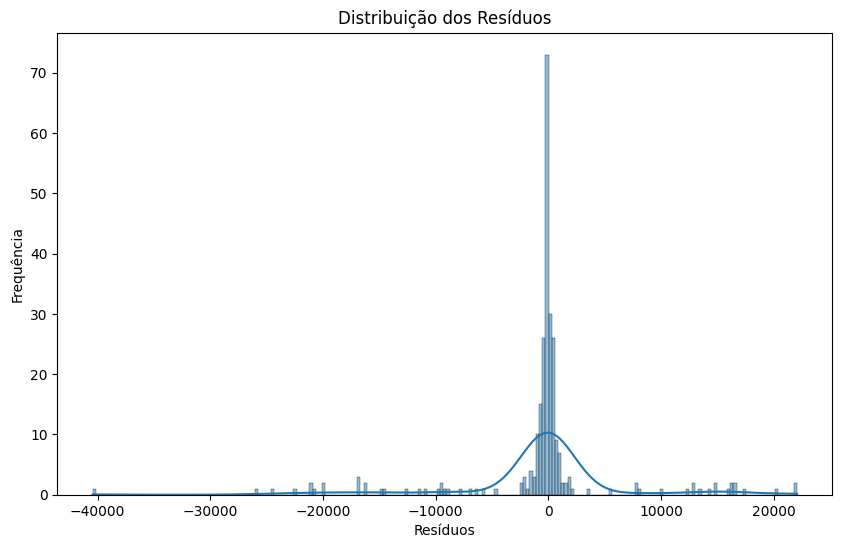

In [39]:
# Calculando os resíduos (diferença entre valores reais e previstos)
residuals = y_test - y_pred

# Plotando o histograma dos resíduos
plt.figure(figsize=(10,6))
sns.histplot(residuals, kde=True)
plt.title('Distribuição dos Resíduos')
plt.xlabel('Resíduos')
plt.ylabel('Frequência')
plt.show()

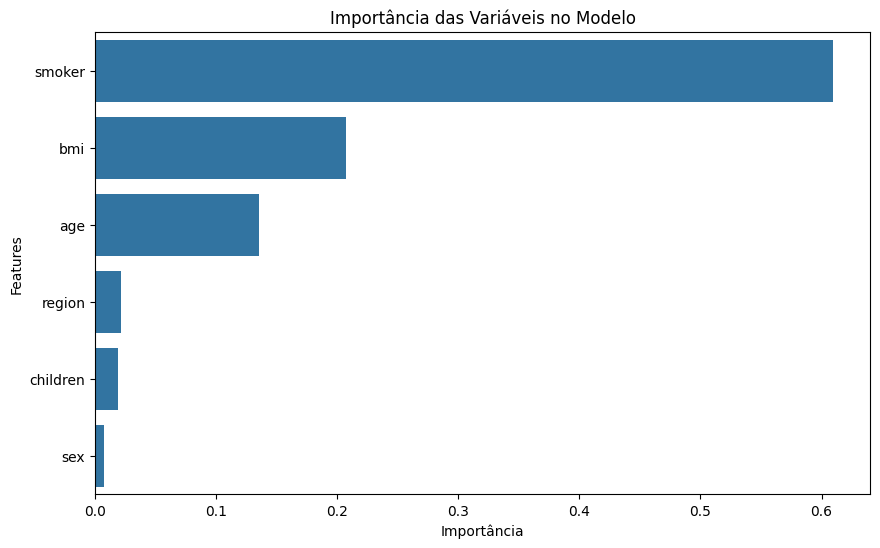

In [40]:
# Se estiver usando RandomForest ou DecisionTree, pode acessar a importância das features
importances = model.feature_importances_

# Colocar as features e suas importâncias em um DataFrame
feature_importance_df = pd.DataFrame({'Features': X_train.columns, 'Importância': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importância', ascending=False)

# Gráfico de barras para a importância das features
plt.figure(figsize=(10, 6))
sns.barplot(x='Importância', y='Features', data=feature_importance_df)
plt.title('Importância das Variáveis no Modelo')
plt.show()


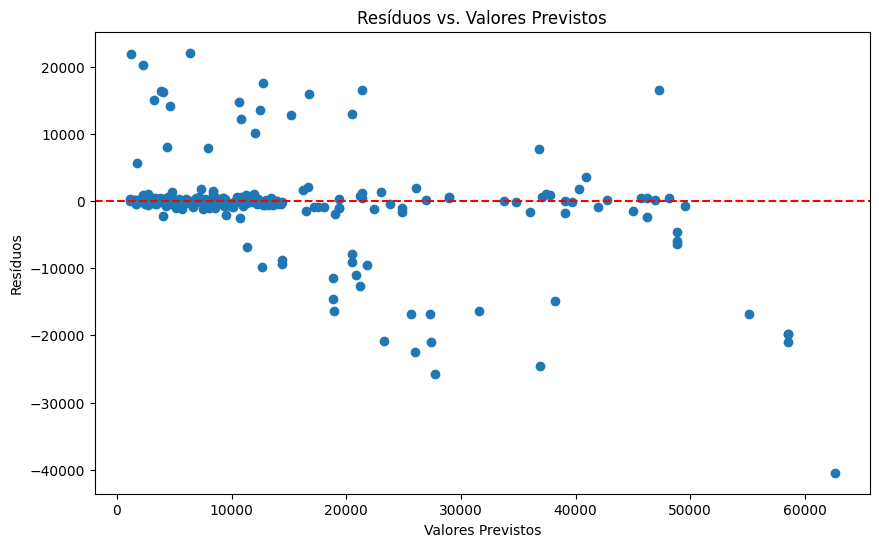

In [41]:
plt.figure(figsize=(10,6))
plt.scatter(y_pred, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Resíduos vs. Valores Previstos')
plt.xlabel('Valores Previstos')
plt.ylabel('Resíduos')
plt.show()

In [ ]:
# Com base na análise dos gráficos, foi possível observar alguns padrões importantes sobre o modelo preditivo que desenvolvi. No gráfico de valores reais vs. previstos, notei que, em geral, o modelo conseguiu capturar bem a relação entre as variáveis e os encargos médicos, com a linha de tendência ficando bastante próxima da diagonal ideal (onde os valores reais e previstos seriam iguais). Isso indica que o modelo faz boas previsões, mas ainda apresenta algumas pequenas variações.
# 
# No histograma dos resíduos, a distribuição dos erros de previsão mostrou-se bastante equilibrada, com a maioria dos erros próximos de zero. Esse comportamento é um bom sinal, já que sugere que o modelo não está cometendo erros sistemáticos, como subestimar ou superestimar os valores de maneira consistente. Isso valida que as previsões não estão tendendo a valores muito acima ou muito abaixo dos reais.
# 
# O gráfico de importância das variáveis revelou quais características têm maior impacto sobre os custos médicos. Fatores como a idade, o índice de massa corporal (IMC) e o fato de ser fumante se destacaram como os mais importantes. Isso faz sentido, já que são características conhecidas por influenciar diretamente o custo dos cuidados com a saúde.
# 
# Em resumo, os resultados visuais confirmam que o modelo tem bom desempenho na previsão dos valores, e que as variáveis mais relevantes para a previsão estão de acordo com o que seria esperado pela lógica de negócios. Há sempre espaço para melhorias, mas o modelo inicial já entrega previsões sólidas.